In [15]:
### Loading the liabraries
## Importing all the necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import statistics
from sklearn.model_selection import train_test_split
from sklearn import metrics
## Displaying multiple outputs in the Jupyter file
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Loading the File

In [2]:
## Let's understand the concept using a dataset curve.csv
file_location =  r'C:\Users\U367393\Documents\01 Personal Documents\Python\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data'
file_name = 'curve.csv'
curve = pd.read_csv(file_location + '\\' + file_name)

# Looking at the Dataset

In [3]:
## Let's look at the data
curve.head(5)

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


# Plotting the Dataset


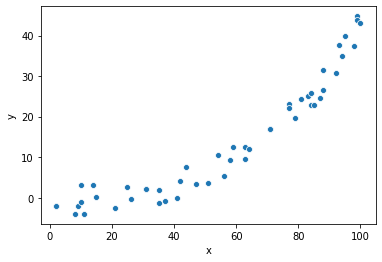

In [4]:
## Plotting the dataset
import seaborn as sn
sn.scatterplot(curve['x'] , curve['y'])

# Fitting a Linear Curve

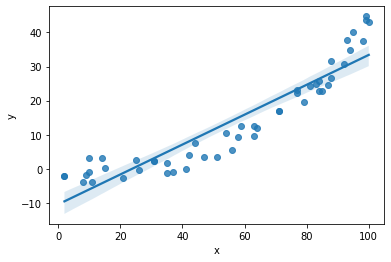

In [19]:
sn.regplot(x = curve['x'] , y=curve['y'] , order=1 )

Looking at the scatterplot, it is obvious that there is not linear relationship between y and x variables. The relationship is rather polynomial. Its very obvious that a 1 degree polynomial or a line will not be able to capture the relationship properly. 

This inability of a machine learning method (Linear Regression here) to capture the true relationship in the data is called <B> BIAS </B>. We can say that linear regression has high bias in this case. 

The ability of a model to generalize the fit is called <B> Variance </B>. For example, If a model is trained on a 'Training Dataset' and gives predictions with similar accuracy on the 'Test' dataset is a <B> Low Variance </B> model.

# Fitting Higher Order Curves

## Order 2 Polynomial

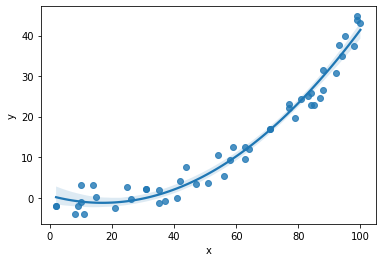

In [6]:
## Using the regression equation 
## y(pred) = b1(x) + b2(x^2) + E : Fitting a quadratic curve
sn.regplot(x = curve['x'] , y=curve['y'] , order=2)

## Order 10 Polynomial

(-10, 56.101602759759324)

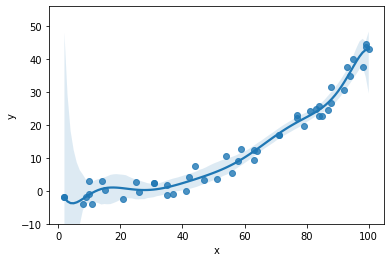

In [8]:
## Using the regression equation to fit polynomial of degree 10
## y(pred) = b1(x) + b2(x^2) + + b3(x^3) +........+ b10(x^10) + E :
sn.regplot(x = curve['x'] , y=curve['y'] , order=10)
plt.ylim(bottom = -10)

Where should we stop? What is the ideal degree of polynomial that we should take?

# Now lets create a dataframe that calculates RMSE on Train and test by fitting order 2 to order 15 curves 

In [12]:
## Splitting the dataset into train and test
train_x , test_x , train_y , test_y = train_test_split(curve['x'] , curve['y'] , train_size = 0.6 , random_state = 100)

# Now Let's create a dataframe that will fit multiple degree curves to the data and will calculate the Root Mean Square Error (RMSE) on train and test data

Increasing the degree of the fit helps in providing flexibility to the model to account for variability in the training dataset, thereby reducing its Bias. 

We are using RMSE as a measure of variance in the model.

In [16]:
## Creating function
max_deg = 15
## Defining the dataframe
df = pd.DataFrame( columns = ['pol_degree' , 'rmse_train' , 'rmse_test'])
                  
for degree in range(1,(max_deg+1)):
    coeff = np.polyfit(x = train_x , y = train_y , deg = degree)
    pred_train = np.polyval(coeff , train_x)
    pred_test = np.polyval(coeff , test_x)
    rmse_train = np.sqrt(metrics.mean_squared_error(train_y , pred_train))
    rmse_test = np.sqrt(metrics.mean_squared_error(test_y , pred_test))
    df.loc[(degree-1) , 'pol_degree'] = degree
    df.loc[(degree-1) , 'rmse_train'] = rmse_train
    df.loc[(degree-1) , 'rmse_test'] = rmse_test

df.head(5)

,pol_degree,rmse_train,rmse_test
0,1,5.22664,5.77965
1,2,2.39451,2.75529
2,3,2.23355,2.56018
3,4,2.232,2.5492
4,5,2.19753,2.42873


# Let's plot the both the RMSEs on a single chart

Text(0.5, 0, 'Degree of Fit')

Text(0, 0.5, 'RMSE')

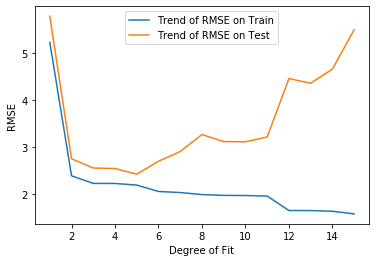

In [18]:
plt.plot(df['pol_degree'] , df['rmse_train'] , label = 'Trend of RMSE on Train')
plt.plot(df['pol_degree'] , df['rmse_test'] , label = 'Trend of RMSE on Test')
plt.xlabel('Degree of Fit')
plt.ylabel('RMSE')
plt.legend()

We can observe that as the degree of fit increases, the RMSE of both test and train decreases. For degree of fit more than 5, the RMSE of train dataset decreases but it increases for the test dataset. This means as we lower the bias, the model tends to overfit, improving its accuracy on the training set but degrading the accuracy on the test dataset.